In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import t
import statsmodels.formula.api  as smf
sns.set_style(style="darkgrid")

In [2]:
diamond = pd.read_csv('../data/diamond.csv').drop('Unnamed: 0', axis=1)

In [3]:
y = diamond['price']
x = diamond['carat']
n = len(y)

In [4]:
beta1 = np.corrcoef(x, y)[0][1] * y.std() / x.std()
beta0 = y.mean() - beta1 * x.mean()

In [5]:
e = y - beta0 - beta1 * x
sigma = np.sqrt(sum(e ** 2) / (n-2))

In [6]:
ssx = ((x - x.mean()) ** 2).sum()
seBeta0 = (1 / n + x.mean() ** 2 / ssx) ** 0.5 * sigma
seBeta1 = sigma / np.sqrt(ssx)

In [7]:
tBeta0 = beta0 / seBeta0
tBeta1 = beta1 / seBeta1

In [8]:
pBeta0 = 2 * t.sf(abs(tBeta0), df=n-2) # Survival function (1-cdf).
pBeta1 = 2 * t.sf(abs(tBeta1), df=n-2) 

In [9]:
coefTable = pd.DataFrame(
    {'Estimate': [beta0, beta1], 
     'Std. Error':[seBeta0, seBeta1],
     't value': [tBeta0, tBeta1], 
     'P(>|t|)':[pBeta0, pBeta1]}, 
    index = ['(Intercept)','x']
)
print(coefTable)


                Estimate  Std. Error    t value       P(>|t|)
(Intercept)  -259.625907   17.318856 -14.990938  2.523271e-19
x            3721.024852   81.785880  45.497155  6.751260e-40


In [10]:
data = {
    'y': y,
    'x': x,
}
data = pd.DataFrame(data)

model = smf.ols(formula = 'y ~ x', data=diamond).fit()

In [11]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     2070.
Date:                Tue, 05 Mar 2019   Prob (F-statistic):           6.75e-40
Time:                        17:23:55   Log-Likelihood:                -233.20
No. Observations:                  48   AIC:                             470.4
Df Residuals:                      46   BIC:                             474.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -259.6259     17.319    -14.991      0.0

In [12]:
model.conf_int(alpha=0.05)

,0,1
Intercept,-294.486957,-224.764858
x,3556.398413,3885.651290


## Prediction

In [13]:
newx = {
    'x': np.arange(min(x), max(x), step=(max(x) - min(x)) / 100),    
}
newx = pd.DataFrame(newx)

In [14]:
dat = model.get_prediction(newx).summary_frame()

In [15]:
dat['x'] = newx['x']

In [16]:
dat.columns

Index(['mean', 'mean_se', 'mean_ci_lower', 'mean_ci_upper', 'obs_ci_lower',
       'obs_ci_upper', 'x'],
      dtype='object')

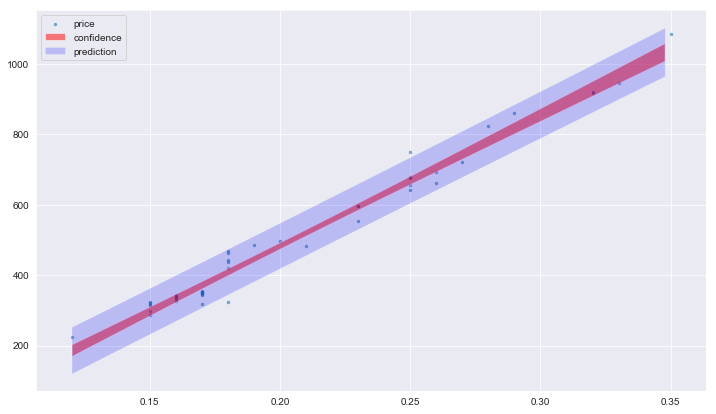

In [17]:
'''
    fill_between: Fill the area between two horizontal curves.
'''
fig, ax = plt.subplots(figsize=(12, 7))
plt.scatter(x=x, y=y, alpha=0.5, s=6)
plt.fill_between( 
    dat['x'], dat['mean_ci_lower'], dat['mean_ci_upper'], 
    alpha=0.5, facecolor='red', label='confidence'
)
plt.fill_between( 
    dat['x'], dat['obs_ci_lower'], dat['obs_ci_upper'], 
    alpha=0.2, facecolor='blue', label='prediction')
plt.legend()